### Binary Classfication model result

In [1]:
import numpy as np
import random
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from xgboost import XGBClassifier
import os
from sklearn.feature_selection import RFECV
import pandas as pd
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    KFold,
)
from sklearn.metrics import f1_score, mean_squared_error, mean_absolute_error
import numpy as np
from numpy.lib.function_base import average
import pandas as pd
import matplotlib.pyplot as plt

from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    KFold,
)
from sklearn.feature_selection import SelectKBest, SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import importlib
import os
from sklearn.feature_selection import (
    SelectKBest,
    RFE,
    mutual_info_regression,
    f_regression,
    mutual_info_classif,
)
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import xgboost as xgb
import random
import pickle
import openpyxl
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import pickle
from sklearn.linear_model import LinearRegression
import geopandas as gpd
import random
import importlib

In [2]:
def unweighted_random(y_train, y_test):
    options = y_train.value_counts(normalize=True)
    y_pred = random.choices(population=list(options.index), k=len(y_test))
    return y_pred

def weighted_random(y_train, y_test):
    options = y_train.value_counts()
    y_pred = random.choices(
        population=list(options.index), weights=list(options.values), k=len(y_test)
    )
    return y_pred

In [3]:
wor_dir="/home/fbf/"
wor_dir="C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/Typhoon-Impact-based-forecasting-model/IBF-Typhoon-model/"
os.chdir(wor_dir)

cdir = os.getcwd()

In [4]:
file_name = "models/output/v1/df_predicted_xgb_binary.csv"
path = os.path.join(cdir, file_name)
df_predicted_xgb_binary=pd.read_csv(path)

file_name = "models/output/v1/df_predicted_rf_binary.csv"
path = os.path.join(cdir, file_name)
df_predicted_rf_binary=pd.read_csv(path)

file_name = "models/output/v1/df_predicted_random_weighted.csv"
path = os.path.join(cdir, file_name)
df_predicted_random_weighted=pd.read_csv(path)

file_name = "models/output/v1/df_predicted_random.csv"
path = os.path.join(cdir, file_name)
df_predicted_random=pd.read_csv(path)

In [5]:

models = {
    "Random Fores": df_predicted_rf_binary,
    "XGBoost": df_predicted_xgb_binary,
    "Random": df_predicted_random,
    "Weighted Random": df_predicted_random_weighted,
}

f1 = []
precision = []
recall = []

# add 'list' if error
for df_temp in models.values():
    f1.append(f1_score(list(df_temp["actual"]), list(df_temp["predicted"])))
    precision.append(precision_score(list(df_temp["actual"]), list(df_temp["predicted"])))
    recall.append(recall_score(list(df_temp["actual"]), list(df_temp["predicted"])))

df_results_binary = pd.DataFrame(
    {"Models": list(models.keys()), "F1 score": f1, "Recall": recall, "Precision": precision}
)
display(df_results_binary)

,Models,F1 score,Recall,Precision
0,Random Fores,0.501695,0.448485,0.569231
1,XGBoost,0.491917,0.430303,0.574124
2,Random,0.100110,0.460606,0.056158
3,Weighted Random,0.072110,0.068687,0.075893


In [16]:
models = {
    "Random Fores": df_predicted_rf_binary,
    "XGBoost": df_predicted_xgb_binary,
    "Random": df_predicted_random,
    "Weighted Random": df_predicted_random_weighted,
}

f1 = []
precision = []
recall = []

# add 'list' if error
for df_temp in models.values():
    f1.append(f1_score(list(df_temp["actual"]), list(df_temp["predicted"])))
    precision.append(precision_score(list(df_temp["actual"]), list(df_temp["predicted"])))
    recall.append(recall_score(list(df_temp["actual"]), list(df_temp["predicted"])))

df_results_binary = pd.DataFrame(
    {"Models": list(models.keys()), "F1 score": f1, "Recall": recall, "Precision": precision}
)
display(df_results_binary)

,typhoon,actual,predicted
0,bopha2012,0,0
1,bopha2012,0,0
2,bopha2012,0,0
3,bopha2012,0,0
4,bopha2012,0,0
...,...,...,...
8068,yutu2018,0,0
8069,yutu2018,0,0
8070,yutu2018,0,0
8071,yutu2018,0,0


In [17]:
### Results 

models = {
    "Random Fores": df_predicted_rf_binary,
    "XGBoost": df_predicted_xgb_binary,
    "Random": df_predicted_random,
    "Weighted Random": df_predicted_random_weighted,
}

 

f1dic = {}
precisiondic = {}
recalldic={}
 

# add 'list' if error
for keys,df_temp in models.items():
    f1 = {}
    precision = {}
    recall = {}
    evs=[]
    for key,groups in df_temp.groupby(['typhoon']):
        f1[key]=f1_score(list(groups["actual"]),list( groups["predicted"]))
        precision[key]=precision_score(list(groups["actual"]), list(groups["predicted"]))
        recall[key]=recall_score(list(groups["actual"]), list(groups["predicted"]))
        
    f1dic[keys]=f1
    precisiondic[keys]=precision
    recalldic[keys]=recall


#df_results_regr = pd.DataFrame({"Models": list(models.keys()), "MAE": mae, "RMSE": rmse})
#display(df_results_regr)

C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:124

C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:149

C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ATeklesadik\Miniconda3\envs\geo_env\lib\site-packages\sklearn\met

In [19]:
f1dic 
precisiondic 
recalldic.keys()
['Random Fores', 'XGBoost', 'Random', 'Weighted Random']

dict_keys(['Random Fores', 'XGBoost', 'Random', 'Weighted Random'])

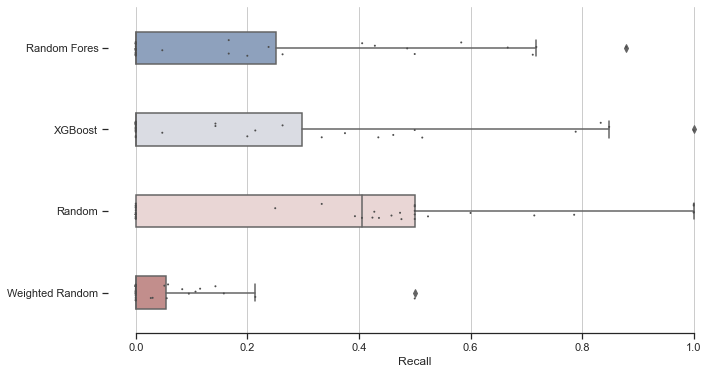

In [34]:
list_df=[]
for keys in recalldic.keys():
    df=pd.DataFrame.from_dict(recalldic[keys],orient='index')
    reset_df = df.reset_index()
    reset_df=reset_df.rename(columns={'index':'typhoon',0:'Recall'})
    reset_df['Models']=keys
    list_df.append(reset_df)

df_recall = pd.concat(list_df)

plt.rcParams.update({'font.size': 18})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(11, 6))
#ax.set_xscale("log")

 
# Plot the orbital period with horizontal boxes
sns.boxplot(y='Models', x='Recall', data=df_recall,
            whis=[0, 99], width=.4, palette="vlag")

# Add in points to show each observation
sns.stripplot(y='Models', x='Recall', data=df_recall,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.despine(trim=True, left=True)
f.savefig('clas_algorithms_comparsion_recall.jpg', format='jpg', dpi=600)

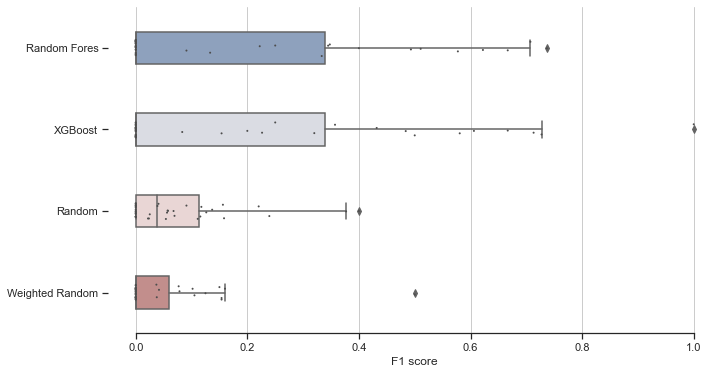

In [47]:
list_df=[]
for keys in f1dic.keys():
    df=pd.DataFrame.from_dict(f1dic[keys],orient='index')
    reset_df = df.reset_index()
    reset_df=reset_df.rename(columns={'index':'typhoon',0:'F1 score'})
    reset_df['Models']=keys
    list_df.append(reset_df)

df_F1 = pd.concat(list_df)

plt.rcParams.update({'font.size': 18})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(11, 6))
#ax.set_xscale("log")

 
# Plot the orbital period with horizontal boxes
sns.boxplot(y='Models', x='F1 score', data=df_F1,
            whis=[0, 99], width=.4, palette="vlag")

# Add in points to show each observation
sns.stripplot(y='Models', x='F1 score', data=df_F1,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.despine(trim=True, left=True)
f.savefig('clas_algorithms_comparsion_F1.jpg', format='jpg', dpi=600)

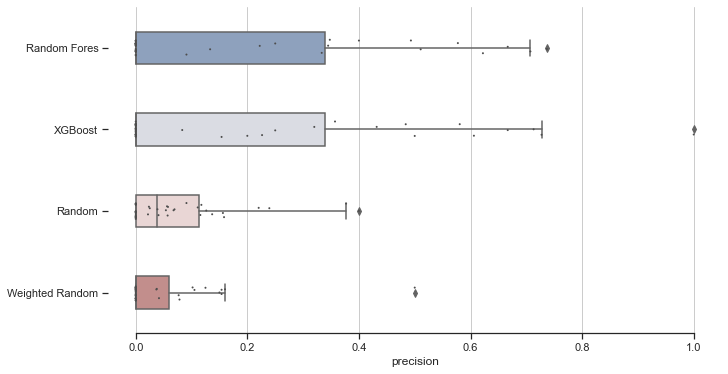

In [37]:
list_df=[]
for keys in precisiondic.keys():
    df=pd.DataFrame.from_dict(f1dic[keys],orient='index')
    reset_df = df.reset_index()
    reset_df=reset_df.rename(columns={'index':'typhoon',0:'precision'})
    reset_df['Models']=keys
    list_df.append(reset_df)

df_recall = pd.concat(list_df)

plt.rcParams.update({'font.size': 18})
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(11, 6))
#ax.set_xscale("log")

 
# Plot the orbital period with horizontal boxes
sns.boxplot(y='Models', x='precision', data=df_recall,
            whis=[0, 99], width=.4, palette="vlag")

# Add in points to show each observation
sns.stripplot(y='Models', x='precision', data=df_recall,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
sns.despine(trim=True, left=True)
f.savefig('clas_algorithms_comparsion_precision.jpg', format='jpg', dpi=600)

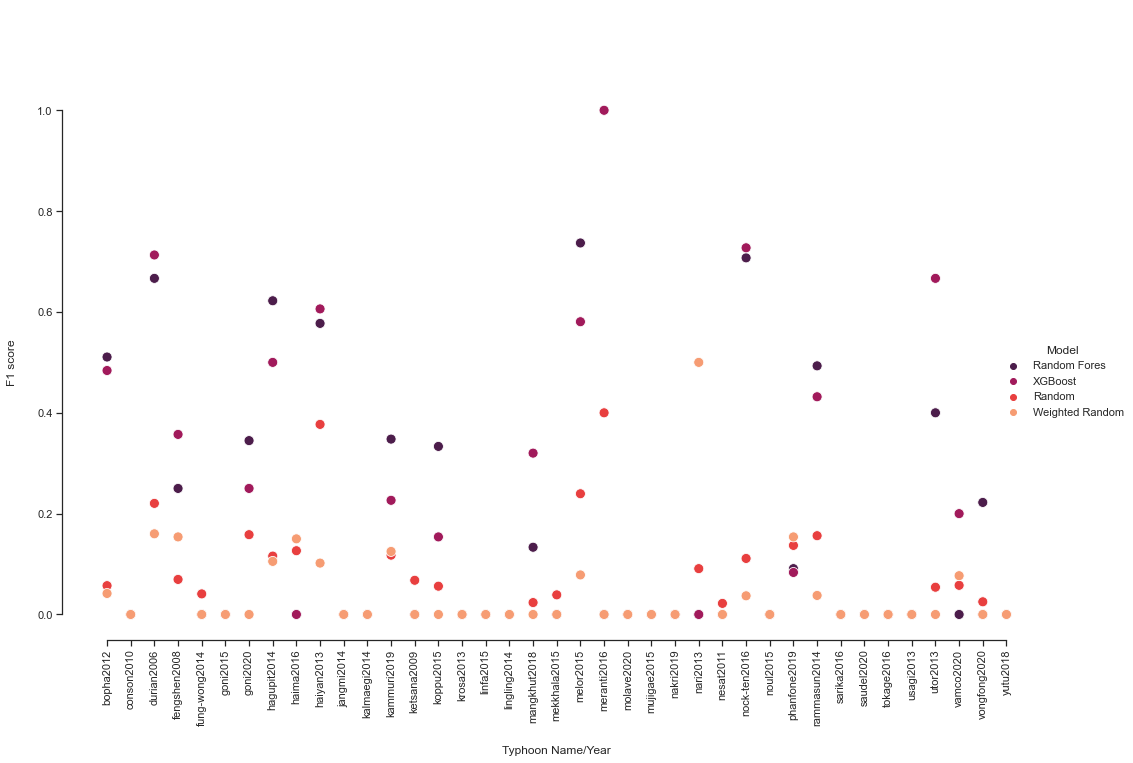

In [58]:
 
plt.rcParams.update({'font.size': 16}) 
g=sns.relplot(
    data=df_F1,#.sort_values(by='F1',ascending=False),
    x="typhoon", y="F1 score", hue="Models", palette="rocket", marker="o", s=100)
g.set_axis_labels("Typhoon Name/Year", "F1 score", labelpad=20)
g.legend.set_title("Model")
g.figure.set_size_inches(16.5, 9.5)
g.set_xticklabels(rotation=90)
g.ax.margins(.05)
g.despine(trim=True) 
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((1.05, 1.06))
#sns.move_legend("lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
g.savefig('classfication_algorithms_comparsion.jpg', format='jpg', dpi=400)
